*George Calvert*, CPSC 322, Fall 2023, Final Project

# Data Discovery:

For this project I will be using two different tables of data. The first will be inpatient charges which contains the locaion of a hospital, the service provided to the paitient, and finally the average cost for the service. The second is Hospital General information which contains the location of a hospital and then ratings for different services they provide. For classification, I will be developing models to predict the region in which a certain hospital resides. This model will be trained using both continous and categorical data. The categorical data will include the Hospital;s overall rating, name, and ownership. The continous data will be the average total amount of money patients paid when visiting. This will be calculated by finding the mean of the payements for each of the hospitals intances in the dataset, ignoring which service the individual patient paid for 

### The Data Sets:

* The first data set is *[Inpatient Charges](https://www.kaggle.com/datasets/speedoheck/inpatient-hospital-charges)*.

    Which is described as:
    > Variation of hospital charges in the various hospitals in the US for the top 100 diagnoses.
    > This dataset will show you how price for the same diagnosis and the same treatment and in the same city can vary differently across different providers. It might help you or your loved one find a better hospital for your treatment. You can also analyze to detect fraud among providers.
    
    The attributes in this dataset are:

    * DRG Definition = Nominal - Service/Condition for being in hospital
    * Provider Id = Nominal - Id for the specific hospital
    * Provider Name = Nominal - Name of the Hospital 
    * Provider Street Address = Nominal - Address of the Hospital
    * Provider City = Nominal - City Hospital is Located
    * Provider State = Nominal - State Hospital is Located
    * Provider ZIP Code = Nominal - Zip Code of Hospital
    * Hospital Referall Region Description - Nominal - City/Region the Hospital provides for. Ex: "CA - Los Angeles"
    * Total number of Discharges = Interval - Discharges for the given condition in a certain hospital
    * Average Covered Charges = Interval - Amount of Money Covered for the given condition in a certain hospital
    * Average Total Payments = Interval - Average total payment for service

* The second data set is *[Hospital General Information](https://www.kaggle.com/datasets/center-for-medicare-and-medicaid/hospital-ratings?rvi=1)*.

    Which is described as:
    > The official datasets used on the Medicare.gov Hospital Compare Website provided by the Centers for Medicare & Medicaid Services. These data allow you to compare the quality of care at over 4,000 Medicare-certified hospitals across the country.

    The attributes in this data set are:
    * Provider ID = Nominal - Id for the specific hospital
    * Hospital Name = Nominal - Name of the Hospital
    * Address = Nominal - Address of the Hospital
    * City = Nominal - City Hospital is Located
    * State = Nominal - State Hospital is Located
    * ZIP Code = Nominal - Zip Code of Hospital
    * County Name = Nominal - County for specific Hospital
    * Phone Number = Nominal - Phone Number for a Hospital
    * Hospital Type = Nominal - Type of Hospital (ie. Acute Care, Critical Access)
    * Hospital Ownership = Nominal - Type of Ownership (ie. Voluntary Non-Profit, Proprietary)
    * Emergency Services = Interval - y or n if they have emergency service
    * Meets criteria for meaningful use of EHRs = Interval - y or n for having an Electronic Health record
    * Hospital overall rating = Ordinal - Rating of Hospital 1-5
    * Hospital overall rating footnote = Nominal - Explanation for rating 
    * Mortality national comparison = Nominal - Comparing to national average for Mortality (ie. Same as national average, Below Average, Above Average)
    * Mortality national comparison footnote = Nominal - Explanation
    * Safety of care national comparison = Nominal - Comparing to national average for Safety of Care (ie. Same as national average, Below Average, Above Average)
    * Safety of care national comparison footnote = Nominal - Explanation
    * Readmission national comparison = Nominal - Comparing to national average for readmission (ie. Same as national average, Below Average, Above Average)
    * Readmission national comparison footnote = Nominal - Explanation
    * Patient experience national comparison = Nominal - Comparing to national average for Patient Experience (ie. Same as national average, Below Average, Above Average)
    * Patient experience national comparison footnote = Nominal - Explanation 
    * Effectiveness of care national comparison = Nominal - Comparing to national average for Effectiveness of Care(ie. Same as national average, Below Average, Above Average)
    * Effectiveness of care national comparison footnote = Nominal - Explanation
    * Timeliness of care national comparison = Nominal - Comparing to national average for Timliness of care (ie. Same as national average, Below Average, Above Average)
    * Timeliness of care national comparison footnote = Nominal Explanation
    * Efficient use of medical imaging national comparison = Comparing to national average for Efficient use of medical imaging (ie. Same as national average, Below Average, Above Average)
    * Efficient use of medical imaging national comparison = Nominal - Explanation



I will joining these two data sets together, matching on the Hospital's name, and address. Then I will create a new attribute "region" which will be based on the state in which the hospital resides. I will then be cleaning the joined table by removing rows with missing values in the overall ratings, then replacing the missing average costs, with the average cost of hospitals within that state.

# Exploratory Analysis and Visualizations

### Loading Libraries and Data Sets

In [102]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

In [103]:
inpatient_charges_table = DataTable(["DRG Definition","Provider Id","Hospital Name","Address","City",
                                    "State","ZIP Code","Hospital Referral Region Description", "Total Discharges" , 
                                    "Average Covered Charges" , "Average Total Payments ","Average Medicare Payments"])

hospital_info_table = DataTable(["Provider ID","Hospital Name","Address","City","State","ZIP Code","County Name",
                                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                                "Meets criteria for meaningful use of EHRs","Hospital overall rating","Hospital overall rating footnote",
                                "Mortality national comparison","Mortality national comparison footnote",
                                "Safety of care national comparison","Safety of care national comparison footnote",
                                "Readmission national comparison","Readmission national comparison footnote",
                                "Patient experience national comparison","Patient experience national comparison footnote",
                                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote"])                               
inpatient_charges_table.load("inpatientCharges.csv")
hospital_info_table.load("Hospital General Information UTF-8.csv")

### Combining Tables on Hospital Name, Address, City, State, ZIP Code
* Not including non-matching rows

In [104]:
combined_table = DataTable.combine(inpatient_charges_table, hospital_info_table, ["Hospital Name", "Address", "City", "State", "ZIP Code"])
del combined_table[0]

### Data Set Facts:

In [105]:
print("Number Instances: ", combined_table.row_count())
print("Number Columns: ", combined_table.column_count())

Number Instances:  106683
Number Columns:  35


In [106]:
print("Number of States Represented: ", len(distinct_values(combined_table, 'State')))
print("Number of Distinct Hospitals: ", len(distinct_values(combined_table, "Hospital Name")))
print("Number Conditions Represented: ", len(distinct_values(combined_table, "DRG Definition")))

Number of States Represented:  51
Number of Distinct Hospitals:  2059
Number Conditions Represented:  100


### Visualizations

*Distribution of Hospital Ratings*

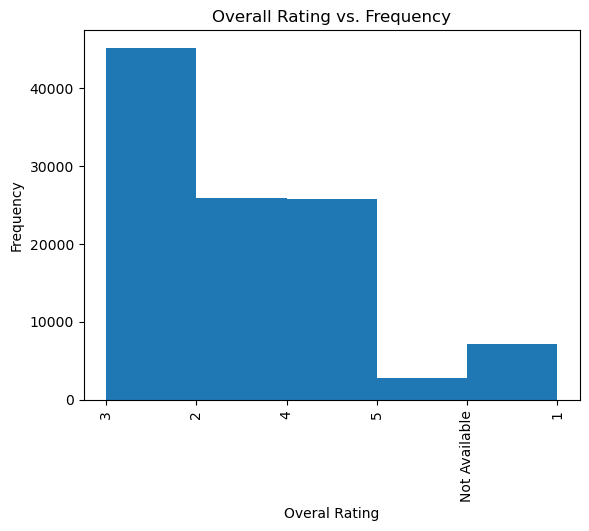

<Figure size 12000x12000 with 0 Axes>

In [107]:
histogram(combined_table, "Hospital overall rating", 5, "Overal Rating", "Frequency", "Overall Rating vs. Frequency")

Here we can see that most hospitals in this data set were rated 3 out of 5 which makes sense since I feel that most people when tasked with rating a hospital would most likely neither have a great or terrible experience then when they are on either side of the spectrum it might include biases. So when developing my classifier when predicting the region this most likely will have little impact.

*Distribution of Hopitals per Region*

To start I first must create a region attribute base on the hosptal's state

In [108]:
state_table = DataTable(['State', "Average Total Payments "])
for row in combined_table:
    state_table.append([row['State'], row["Average Total Payments "]])
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = state_table.columns()
temp.append('Region')
region_table = DataTable(temp)
for row in range(state_table.row_count()):
    vals = state_table[row].values()
    vals.append(state_to_region_dict[state_table[row]["State"]])
    region_table.append(vals)
print(region_table.rows([randint(0, region_table.row_count() - 1) for x in range(10)]))

State    Average Total Payments     Region
-------  -------------------------  ---------
CT       $5548.13                   Northeast
PA       $10028.14                  Northeast
NY       $7241.33                   Northeast
TN       $3783.76                   South
NV       $11943.76                  West
MI       $7163.27                   Midwest
OH       $8329.18                   Midwest
OR       $5698.31                   West
CA       $13139.10                  West
CA       $13494.23                  West


> Random sample of the region table

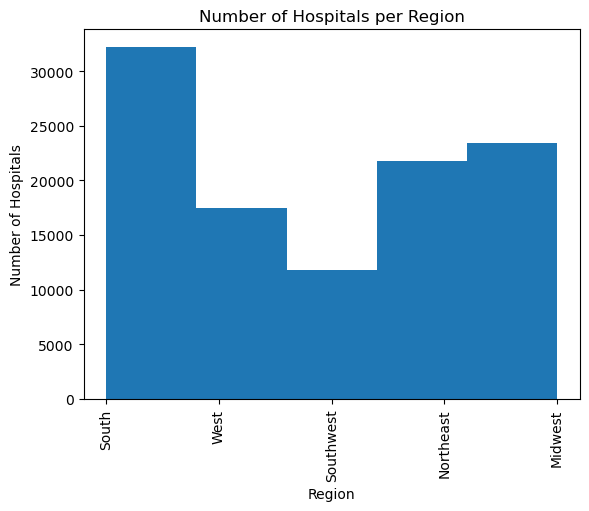

<Figure size 12000x12000 with 0 Axes>

In [109]:
histogram(region_table, 'Region', 5, "Region", "Number of Hospitals", "Number of Hospitals per Region")

Here we can see that most hospitals in this dataset are in the South region of the United States. In context of predictng the region based on other factors my classifiers might skew to predict South for most hospitals since it has the most occurances.

*Distribution of Average Cost per Region* 

First I must convert the payments attribute to decimal values instead of Strings

In [110]:
# converting
for row in range(region_table.row_count()):
    s = region_table[row]["Average Total Payments "]
    s = s.replace("$", "")
    s = region_table.convert_numeric(s)
    region_table[row]["Average Total Payments "] = s

Creating a list of tables partitioned on region so I can calcualte the averages per region

In [111]:
# partition on state annd create averages
p_list = partition(region_table, ["Region"])

In [112]:
label = []
d = []
for p in p_list:
    vals = []
    name = p[0]["Region"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_region = DataTable(['Region', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_region.append([label[s], d[s]])
print(hospital_avg_prices_region)

Region       Average Total Payments
---------  -------------------------
South                        8808.2
West                        11641.6
Southwest                    9260.86
Northeast                   10592.9
Midwest                      9289.14


Distribution of Region and Average Payments

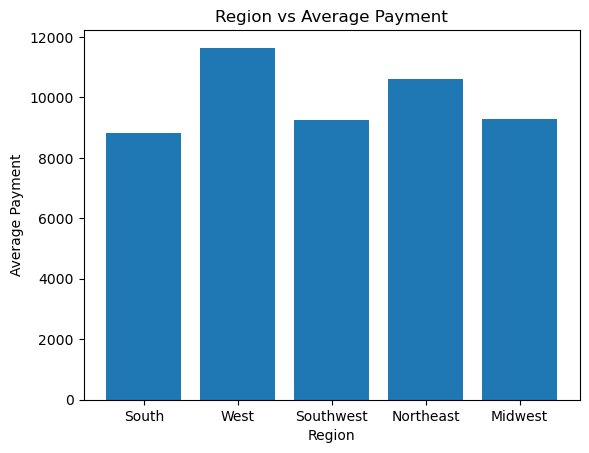

In [113]:
bar_chart(column_values(hospital_avg_prices_region, "Region"), column_values(hospital_avg_prices_region, "Average Total Payments "), "Region", "Average Payment", "Region vs Average Payment")

Originally I believed that the average cost per region would be drastically different, hwoever it seems they are generally the same for each. So for my classifier I will experiment not using it to see if my measurement scores increase with or without that attribute

*Clusters of Average Payment per State*

> Will be using 7 clusters

Calculating average costs per state

In [114]:
state_dict = {}
dist_vals = distinct_values(region_table, "State")
for val in range(len(dist_vals)):
    state_dict[dist_vals[val]] = val

for row in region_table:
    row["State"] = state_dict[row["State"]]

label = []
d = []
p_list = partition(region_table, ["State"])
for p in p_list:
    vals = []
    name = p[0]["State"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_state = DataTable(['State', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_state.append([label[s], d[s]])


Creating clusters of states

In [115]:
centroids = select_k_random_centroids(hospital_avg_prices_state, 5)
clusters = k_means(hospital_avg_prices_state, centroids, ["State", "Average Total Payments "])
two_tss = tss(clusters, ['State', 'Average Total Payments '])
print(two_tss)

[6132783.806235194, 512332.487555416, 257936.10806671664, 317011.4786781613, 546511.359146382]


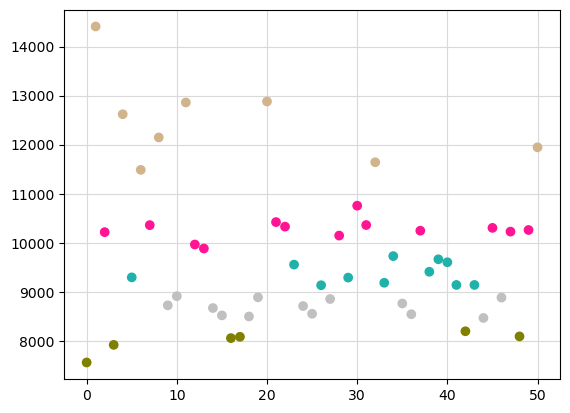

In [184]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure()
plt.grid(color='0.85', zorder=0)

colors = list(mcolors.CSS4_COLORS.values())
shuffle(colors)
for c in range(len(clusters)):
   plt.scatter(column_values(clusters[c], 'State'), 
            column_values(clusters[c], 'Average Total Payments '), 
            c=colors[c], linestyle='', zorder=3)
plt.show()
plt.close()

Here I have displayed the 7 clusters that were created from the average cost by State. So it looks like it varies pretty drastically by state but this could also be by region. Again I will experiement using average cost or not with my classifiers to see if the scores improve with or without them. 

For developing my classifiers I will be using the columns Hospital name, Hospital Ownership, Hospital Type and Average Total Payments to predic the region in which a hospital is. This is because I believe this will have the highest corelation in predicting the region since cost rating and ownership vary by region.

The types of classifiers I will be using will be KNN, Naive Bayes, Decision Trees, and Random Forests.

# Data Cleaning and Preprocessing

Cleaning

* Dropping unecessary attributes

In [117]:
combined_table.drop(['DRG Definition','Hospital Referral Region Description', 'Total Discharges', 'Average Covered Charges','Average Medicare Payments',
                     'Provider Id', 'County Name', 'Phone Number', 'Emergency Services', 
                     'Meets criteria for meaningful use of EHRs','Hospital overall rating footnote', 'Mortality national comparison', 
                     'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 
                     'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 
                     'Patient experience national comparison footnote', 'Effectiveness of care national comparison', 
                     'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 'Timeliness of care national comparison footnote', 
                     'Efficient use of medical imaging national comparison', 'Efficient use of medical imaging national comparison footnote', 'ZIP Code',
                    "Address", "Provider ID", "City"])
print(combined_table.columns())

['Hospital Name', 'State', 'Average Total Payments ', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating']


I am dropping these attributes because they are not needed when creating my classifiers. I beleive that  they all have no correlation in what region the hospital resides in. However, I will be keeping the columns displayed above since I beleive they will have the biggest effect in what region a hospital resides.

* Remove Rows with Missing values in the overall rating section
> I am doing this since I need rows with an overall rating and It would not be wise to replace the rating with averages by state or by region

In [118]:
for row in range(combined_table.row_count()):
    if combined_table[row]['Hospital overall rating'] == 'Not Available':
        combined_table[row]['Hospital overall rating'] = ''
cleaned_table = remove_missing(combined_table, ['Hospital overall rating'])

* Replace missing values in the average total payment section

> I will replacing the cost with the average cost per that state since using the obverall average would not be wise and may skew the classifiers.

In [119]:
# convert numeric
for row in range(cleaned_table.row_count()):
    temp = cleaned_table[row]['Average Total Payments ']
    temp = temp.replace('$', '')
    num = cleaned_table.convert_numeric(temp)
    cleaned_table[row]['Average Total Payments '] = num
# replace with average in the state
avg = lambda xs : None if not len(xs) else sum(xs) / len(xs)
cleaned_table = replace_missing(cleaned_table, 'Average Total Payments ', ['State'], avg)

Preprocessing

* Normalize Average Payments
    > this will aloow the classifier to do easier calculations when predicitng the region since now the cost will be between 0-1 respectively 

In [120]:
normalize(cleaned_table, "Average Total Payments ")

* Creating Region Attribute and dropping the state attribute

    > I am dropping the state attribute since there are too many different states to predict making it incredibly difficult to predict using a classifier. So dropping it and replacing it with region gives my classification approach more of a chance to predict it. Since instead of 50 different values to choose from it now has 5. 

* Creating region attribute
    > This will be done by using a dictionary which I found online [here](https://gist.github.com/sfirrin/fd01d87f022d80e98c37a045c14109fe).

In [121]:
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = cleaned_table.columns()
temp.append('Region')
hospital_region_table = DataTable(temp)
for row in range(cleaned_table.row_count()):
    state = cleaned_table[row]['State']
    region = state_to_region_dict[state]
    row = cleaned_table[row].values()
    row.append(region)
    hospital_region_table.append(row)

* Dropping State Attribute

In [122]:
hospital_region_table.drop(['State'])

In [123]:
print(hospital_region_table.rows(randint(0, hospital_region_table.row_count() - 1) for x in range(5)))

Hospital Name                            Average Total Payments   Hospital Type         Hospital Ownership                Hospital overall rating  Region
-------------------------------------  -------------------------  --------------------  ------------------------------  -------------------------  ---------
SAINT BARNABAS MEDICAL CENTER                          0.317818   Acute Care Hospitals  Voluntary non-profit - Other                            2  Northeast
UNIVERSITY OF VIRGINIA MEDICAL CENTER                  0.08536    Acute Care Hospitals  Government - State                                      2  South
UPMC PASSAVANT                                         0.0123781  Acute Care Hospitals  Voluntary non-profit - Private                          4  Northeast
LOS ALAMITOS MEDICAL CENTER                            0.0795089  Acute Care Hospitals  Proprietary                                             2  West
OHIO STATE UNIVERSITY HOSPITALS                        0.0736361  Acut

Here is a random sample of 5 rows that displays how the table is now after cleaning

# Classifier Development

Since this data set is so large (106 thousand rows), I will have to greatly diminish the size of the table in order for my classification techniques to run in a reasonable amount of time. So, I will create a smaller data set of around 20 thousand rows for my decision trees then around 2 thousand for my knn and naive bayes, since they are a lot slower than the trees. The distribution of the regions will match that of the original data set. I will be completing this by using the stratify holdout method to return a set that has the same distribution of region values.

In [124]:
temp_set, classification_sample_table = stratified_holdout(hospital_region_table, ['Region'], 20000)

In [125]:
print(classification_sample_table.rows([randint(0, classification_sample_table.row_count() - 1) for x in range(5)]))

Hospital Name                       Average Total Payments   Hospital Type         Hospital Ownership                             Hospital overall rating  Region
--------------------------------  -------------------------  --------------------  -------------------------------------------  -------------------------  ---------
MT SINAI HOSPITAL MEDICAL CENTER                 0.121506    Acute Care Hospitals  Voluntary non-profit - Private                                       2  Midwest
DOCTORS HOSPITAL                                 0.0796252   Acute Care Hospitals  Voluntary non-profit - Church                                        2  Midwest
HARTFORD HOSPITAL                                0.0921923   Acute Care Hospitals  Voluntary non-profit - Private                                       2  Northeast
GWINNETT MEDICAL CENTER                          0.0678432   Acute Care Hospitals  Government - Hospital District or Authority                          4  South
STARR COUNTY MEMORIAL

>Random 5 rows from new table

### Decision Trees
> Since my implementation of decision trees doesnt use continuous data, I will not be using the "Average total payments" attribute

In [126]:
training, test = stratified_holdout(classification_sample_table, ['Region'], classification_sample_table.row_count() // 3)

In [127]:
print(classification_sample_table.columns())

['Hospital Name', 'Average Total Payments ', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating', 'Region']


In [128]:
tree = tdidt_eval(training, test, 'Region', ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

Number values not in tree 78


In [129]:
print(tree)
print(test.row_count(), " Rows in teh test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(tree, val)
        precision_sum += precision(tree, val)
        recall_sum += recall(tree, val)
avg_accuracy = accuracy_sum / (tree.column_count() - 1)
avg_precision = precision_sum / (tree.column_count() - 1)
avg_recall = recall_sum / (tree.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)


actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South         1921       1            4            1         15
West             0    1044            5           12         24
Southwest       10       2          704            0          5
Northeast       11       7            0         1340         11
Midwest          4      12            2            1       1450
6664  Rows in teh test set
Average accuracy =  0.9922866686911631
Average Precision =  0.9808492071888786
Macro Average F-measure =  0.9797937400292318
Average Recall =  0.9787405419512062


While this tree has a very good accuracy when predicting regions it however was unable to predict 78 rows of the 6,664 rows it tested. However in the grand scheme that is a very low amount compared to the entire testing set. So, in actuality the accuracy socres for this classifier should be at least slightly lower.

### Random Forests

> I will be using  F = 4, M = 3, N = 30 to predict the region in which an unknown hospital is. This will select all of the columns in the training set, then the 3 most accurate trees it creates from a total of 50 trees created Then since my implementation of decision trees doesnt use continuous data, I will not be using the "Average total payments" attribute

In [130]:
forest = random_forest_eval(classification_sample_table, training, test, 4, 3, 50, "Region", ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [131]:
print(forest)
print(test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in forest.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(forest, val)
        precision_sum += precision(forest, val)
        recall_sum += recall(forest, val)
avg_accuracy = accuracy_sum / (forest.column_count() - 1)
avg_precision = precision_sum / (forest.column_count() - 1)
avg_recall = recall_sum / (forest.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South         1966       0            0            0          0
West          1102       0            0            0          0
Southwest      737       0            0            0          0
Northeast     1375       0            0            0          0
Midwest       1484       0            0            0          0
6664  Rows in the test set
Average accuracy =  0.7180072028811525
Average Precision =  0.059003601440576224
Macro Average F-measure =  0.09112398609501739
Average Recall =  0.2


Here you can see that the forest performed very very poorly when trying to predict the region. I beleive that this is due to the fact that the forest tends to create trees that are overfitted to the training set. Meaning that even though it is accurate when predicting its particular training and test set it might not bee good at predicitng the overall testing set since it is overfitted. So, when the forest selects the 3 most accurate trees it selects those which are actually very poor in predicting new instances. For instance the msot acurate tree could only be deciding between two regions so when it is tasked to predict a vlaue that is not in either of those two regions it will be very innaccurate when predicitng new instances. 

### KNN
> Here I am going to create an even smaller sample of the actual table since the cost of computing KNN is very high. So I will be using the same method as before but will be creating a sample set of around 2000 instances.

For KNN itself I will be using the 5 closest neighbors with majority voting with the holdout method of developing the training ans test sets

In [132]:
temp_set, knn_sample_table = stratified_holdout(hospital_region_table, ['Region'], 2000)

In [133]:
knn_train, knn_test = holdout(knn_sample_table, knn_sample_table.row_count() // 5)

In [134]:
knn_matrix = knn_eval(knn_train, knn_test, majority_vote, 5, 'Region', ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [135]:
print(knn_matrix)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in knn_matrix.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_matrix, val)
        precision_sum += precision(knn_matrix, val)
        recall_sum += recall(knn_matrix, val)
avg_accuracy = accuracy_sum / (knn_matrix.column_count() - 1)
avg_precision = precision_sum / (knn_matrix.column_count() - 1)
avg_recall = recall_sum / (knn_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South           78       7            3           10         11
West            10      31            9            8          9
Southwest       17       2           20            2          6
Northeast       15       7            2           52          7
Midwest          9      13            5           14         52
399  Rows in the test set
Average accuracy =  0.8335839598997493
Average Precision =  0.5701108421901856
Macro Average F-measure =  0.5639353056285527
Average Recall =  0.5578921242751295


This KNN classifier seems skewed when predicitn the region of a certain hospitals. As I said when displaying the distributions of hospitals the South has quite a bit more than any other region so I am not that surprised that KNN overwhelmingly chose the South over any other region.

### KNN without continuous attributes

In [136]:
knn_no_cont = knn_eval(knn_train, knn_test, majority_vote, 5, 'Region', [], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [137]:
print(knn_no_cont)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in knn_no_cont.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_no_cont, val)
        precision_sum += precision(knn_no_cont, val)
        recall_sum += recall(knn_no_cont, val)
avg_accuracy = accuracy_sum / (knn_no_cont.column_count() - 1)
avg_precision = precision_sum / (knn_no_cont.column_count() - 1)
avg_recall = recall_sum / (knn_no_cont.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          109       0            0            0          0
West            67       0            0            0          0
Southwest       47       0            0            0          0
Northeast       83       0            0            0          0
Midwest         93       0            0            0          0
399  Rows in the test set
Average accuracy =  0.7092731829573934
Average Precision =  0.05463659147869674
Macro Average F-measure =  0.0858267716535433
Average Recall =  0.2


Here without the continuous variable knn performed much much poorer than when it had the conintuoous value. Hinting to the fact that the average payment has a big impact to how close an unknown instance is to a certain instance.

### KNN Stratified
Now I will be using KNN Stratified with 4 folds and the same sample set as the previous knn with the 5 nearest neighbors

In [138]:
knn_strat_matrix = knn_stratified(knn_sample_table, 4, 'Region', majority_vote, 5, ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [139]:
print(knn_strat_matrix)
print(knn_sample_table.row_count(), " Rows in table")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in knn_strat_matrix.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_strat_matrix, val)
        precision_sum += precision(knn_strat_matrix, val)
        recall_sum += recall(knn_strat_matrix, val)
avg_accuracy = accuracy_sum / (knn_strat_matrix.column_count() - 1)
avg_precision = precision_sum / (knn_strat_matrix.column_count() - 1)
avg_recall = recall_sum / (knn_strat_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          537      16            5           13         18
West            20     273            5           18         14
Southwest       30       4          176            3          8
Northeast       30       8            5          353         16
Midwest         21      12           10           21        381
1997  Rows in table
Average accuracy =  0.9445167751627441
Average Precision =  0.8653137557402989
Macro Average F-measure =  0.8574198642739068
Average Recall =  0.8496686960708362


This is surpirsingly a very good classifier when predicitng the region. I am surprised because when I ran regular KNN the overall score was about 50 percent. Meaning that it was right half of the time. So, to have a KNN_straified algorithm that predicts the right region around 85 percent of the time is very good.

### KNN stratified without continuous attribute

In [140]:
knn_strat_no_cont = knn_stratified(knn_sample_table, 4, 'Region', majority_vote, 5, [], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [141]:
print(knn_strat_no_cont)
print(knn_sample_table.row_count(), " Rows in table")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in knn_strat_no_cont.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_strat_no_cont, val)
        precision_sum += precision(knn_strat_no_cont, val)
        recall_sum += recall(knn_strat_no_cont, val)
avg_accuracy = accuracy_sum / (knn_strat_no_cont.column_count() - 1)
avg_precision = precision_sum / (knn_strat_no_cont.column_count() - 1)
avg_recall = recall_sum / (knn_strat_no_cont.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          589       0            0            0          0
West           330       0            0            0          0
Southwest      221       0            0            0          0
Northeast      412       0            0            0          0
Midwest        445       0            0            0          0
1997  Rows in table
Average accuracy =  0.7179769654481724
Average Precision =  0.05898848272408613
Macro Average F-measure =  0.09110595514307812
Average Recall =  0.2


As expected without the continuous value KNN stratified performed much worse since KNN stratified is essentially performing KNN multiple times so of course it performed around the same as normal knn without the average total payments

### Naive Bayes
> Here I will be using the Naive Bayes algorithm with the same test and training sets as KNN since Naive is even more expensive than KNN

In [142]:
naive_matrix = naive_bayes_eval(knn_train, knn_test, 'Region', ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [143]:
print(naive_matrix)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in naive_matrix.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_matrix, val)
        precision_sum += precision(naive_matrix, val)
        recall_sum += recall(naive_matrix, val)
avg_accuracy = accuracy_sum / (naive_matrix.column_count() - 1)
avg_precision = precision_sum / (naive_matrix.column_count() - 1)
avg_recall = recall_sum / (naive_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          105       4            0            0          0
West            55      11            0            1          0
Southwest       44       3            0            0          0
Northeast       74       7            0            2          0
Midwest         89       4            0            0          0
399  Rows in the test set
Average accuracy =  0.718295739348371
Average Precision =  0.266416110745717
Macro Average F-measure =  0.24705406155261012
Average Recall =  0.23031564846267175


This is another classifier that overwhelmingly chose the South for certain hospitals, which as I have said previously, is due to the distribution of hospitals by region

### Naive Bayes no continuous

In [144]:
naive_no_cont = naive_bayes_eval(knn_train, knn_test, 'Region', [], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [145]:
print(naive_no_cont)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in naive_no_cont.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_no_cont, val)
        precision_sum += precision(naive_no_cont, val)
        recall_sum += recall(naive_no_cont, val)
avg_accuracy = accuracy_sum / (naive_no_cont.column_count() - 1)
avg_precision = precision_sum / (naive_no_cont.column_count() - 1)
avg_recall = recall_sum / (naive_no_cont.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          108       0            0            0          1
West            21      45            0            0          1
Southwest       18       0           29            0          0
Northeast       27       0            0           56          0
Midwest         25       2            0            2         64
399  Rows in the test set
Average accuracy =  0.9027568922305764
Average Precision =  0.8870749174852228
Macro Average F-measure =  0.79998815600603
Average Recall =  0.7284719187810783


To my surprise Naive bayes without the continuous value performed much better in predicitng regions. However, as you can see from the table it still was susceptible to predict the South since Naive Bayes performs based on probabilities and having a higher number will obvously mean that that region will be predicted more.

### Naive Bayes Stratified
> Here I will be using 4 folds for my stratified naive bayes algorithm

In [146]:
naive_strat_matrix = naive_bayes_stratified(knn_sample_table, 4, "Region", ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [147]:
print(naive_strat_matrix)
print(knn_sample_table.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in naive_strat_matrix.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_strat_matrix, val)
        precision_sum += precision(naive_strat_matrix, val)
        recall_sum += recall(naive_strat_matrix, val)
avg_accuracy = accuracy_sum / (naive_strat_matrix.column_count() - 1)
avg_precision = precision_sum / (naive_strat_matrix.column_count() - 1)
avg_recall = recall_sum / (naive_strat_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          558      26            0            5          0
West           290      35            0            5          0
Southwest      205      14            0            2          0
Northeast      374      31            0            7          0
Midwest        415      22            0            8          0
1997  Rows in the test set
Average accuracy =  0.7201802704056084
Average Precision =  0.16712567107009288
Macro Average F-measure =  0.1877125628869318
Average Recall =  0.21408386367507473


Here you can see that Naive bayes had the same issue as Naive Bayes stratified which makes sense because Naive bayes uses probability of certain labels in the attribute we are trying to predict to choose the region. Meaning that if there is a higher distribution of South hospitals in the training set it is more likely to predict the South.

### Naive Stratified without continuous

In [148]:
naive_strat_no_cont = naive_bayes_stratified(knn_sample_table, 4, "Region", [], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [149]:
print(naive_strat_no_cont)
print(knn_sample_table.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in naive_strat_no_cont.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_strat_no_cont, val)
        precision_sum += precision(naive_strat_no_cont, val)
        recall_sum += recall(naive_strat_no_cont, val)
avg_accuracy = accuracy_sum / (naive_strat_no_cont.column_count() - 1)
avg_precision = precision_sum / (naive_strat_no_cont.column_count() - 1)
avg_recall = recall_sum / (naive_strat_no_cont.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          582       0            0            3          4
West             0     319            0            2          9
Southwest        2       3          215            0          1
Northeast        1       3            0          405          3
Midwest          0       4            0            3        438
1997  Rows in the test set
Average accuracy =  0.9923885828743113
Average Precision =  0.9815487121365232
Macro Average F-measure =  0.9802638931732238
Average Recall =  0.9789824333948042


To my surprise Naive Bayes stratified was incredibly effective in guessing the right region without the continuous values. Meaning that the algorithm for this is very susceptible to conintuous values.

### Findings

The prior classification approaches tell us that the most accurate methods of predictng the region in which a hospital resides is Decision Trees, KNN stratified with the continuous Average Payment attribute, and Naive Bayes Stratified without the Average Payments. This is because for KNN it had measurement scores in the mid 80s to mid 90s, meaning it was very good in predicting unknown instances. Additionally, my decision tree was even better at predicting with all of its scores being in the high 90s. However, with decision trees it was not able to predict 91 of the rows in the 6 thousand row long test set, meaning that this score is most likely a little lower in reality. Plus, it did not include the continuos data of the Average Total Payments by patient. Additionally Naive Bayes stratified without Average total payments performed exceptionally well even beating Decision trees by about 1 percent. In conclusion hwoever, I beleive I would use my Decision tree when predicitng large data sets since it is very quick due to its recursive algorithm compared to Naive Bayes. For instance, my decision tree was able to run in around 3 seconds with a test set of around 6 thousand rows while naive bayes stratified took a little over a minute with a test set of around 1 thousand. So, I would use my decision tree to predict and run over large data sets.

To create a ensemble technique I will use the combonation of KNN which had an average accuracy of around 70 percent with naive bayes to maybe create a new classifier that has a better accuracy and overal precision when predicting the region

### Ensemble
Here I will create a decently sized sample so the ensemble can run in a reasonable amount of time. (ie. 5000 instances)
Again for knn I will use the 5 nearest neighbors with majority voting. However for both of techniques I will only be using the categorical columns. To decide which overall prediction to do I will use weighted voting where the score is the accuracy of each of the classification techniques

In [150]:
temp_set, ensemble_sample_table = stratified_holdout(hospital_region_table, ['Region'], 5000)

In [151]:
ensemble_train, ensemble_test = holdout(ensemble_sample_table, ensemble_sample_table.row_count() // 5)

In [152]:
ensemble_matrix = ensemble_knn_naive_eval(ensemble_sample_table, ensemble_train, ensemble_test, 5, "Region", ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [153]:
print(ensemble_matrix)
print(ensemble_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in ensemble_matrix.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(ensemble_matrix, val)
        precision_sum += precision(ensemble_matrix, val)
        recall_sum += recall(ensemble_matrix, val)
avg_accuracy = accuracy_sum / (ensemble_matrix.column_count() - 1)
avg_precision = precision_sum / (ensemble_matrix.column_count() - 1)
avg_recall = recall_sum / (ensemble_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          305       0            0            2          3
West            19     142            0            2          5
Southwest       13       1           80            0          0
Northeast       12       5            0          180          2
Midwest         21       2            1            0        204
999  Rows in the test set
Average accuracy =  0.9647647647647647
Average Precision =  0.9380354419162492
Macro Average F-measure =  0.9164766014680062
Average Recall =  0.8958864695875709


So by combinging these two classification techniques I was able to create a new classifier that has very high scores. In fact, it has a higher score of both knn without the coninuous value (around 20 percent) and the naive bayes algorithm (around 20 percent) by quite a distance. As you can see the ensemble had a average accuracy score of 95 percent and an average recall of 89 percent which is very very good.

# Conclusion

Overall I very much enjoyed this project since developing my own libraries and classifiers was very rewarding once they started to work and run, especially when the classification techniques I implemented had high measurement scores. One of the most challenging things about this project was creating the most streamlined algorithm to run over my large datasets. These techniques are very expensive so trying to optimize them to run as quickly as possible was very hard but necessary. This is because if a classifier is developed and can run on large datasets it means it is more representitive of the actual population, making its findings more impactful. In the future, to improve this project, I would like to try and develop a classifier that could predict the certain hospital given certain characteristics. I was unable to do that now becuase again the data set is too large and the number of hospitals that are present is well over 2000. So trying to develop a classifier for that would be quite a big challenge. However, if I were to develop something that was run over the data set to find petterns, ie. unsupervised learning, it could find the best relationships within the table. Allowing me to find certain attribute that would allow me to predict the certain hospital given the amount paid and their overall rating. 